What types of crimes are most common? Where are different types of crimes most likely to occur? Does the frequency of crimes change over the day? Week? Year?

In [2]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df1=pd.read_csv('crime.csv',encoding = 'unicode_escape')
df1.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [4]:
df2=pd.read_csv('offense_codes.csv',encoding = 'unicode_escape')
df2.head()

,CODE,NAME
0,612,LARCENY PURSE SNATCH - NO FORCE
1,613,LARCENY SHOPLIFTING
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES
3,1731,INCEST
4,3111,LICENSE PREMISE VIOLATION


In [5]:
df1['SHOOTING'].value_counts()

Y    1019
Name: SHOOTING, dtype: int64

In [6]:
top_crimes=df1[df1['OFFENSE_CODE'].isin(df1['OFFENSE_CODE'].value_counts()[0:10].index.values)]
topcrimes_merge=top_crimes.merge(df2,left_on=top_crimes['OFFENSE_CODE'],right_on=df2['CODE'])


In [7]:
topcrimes_merge[['OFFENSE_CODE','NAME','OFFENSE_CODE_GROUP']].drop_duplicates()

,OFFENSE_CODE,NAME,OFFENSE_CODE_GROUP
0,1402,VANDALISM,Vandalism
30308,3410,TOWED MOTOR VEHICLE,Towed
52882,3114,INVESTIGATE PROPERTY,Investigate Property
75130,3301,VERBAL DISPUTE,Verbal Disputes
101328,2647,THREATS TO DO BODILY HARM,Other
119412,3006,SICK/INJURED/MEDICAL - PERSON,Medical Assistance
156978,3831,M/V - LEAVING SCENE - PROPERTY DAMAGE,Motor Vehicle Accident Response
173301,802,ASSAULT SIMPLE - BATTERY,Simple Assault
173302,802,ASSAULT & BATTERY,Simple Assault
202899,617,LARCENY THEFT FROM BUILDING,Larceny


The most common crimes are vandalism, towed motor vehicle, investigate property, verbal dispute, assault and theft.

In [8]:
topcrimes_merge.head()

,key_0,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,CODE,NAME
0,1402,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",1402,VANDALISM
1,1402,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",1402,VANDALISM
2,1402,I182070887,1402,Vandalism,VANDALISM,D4,149,NaN,2018-09-01 12:00:00,2018,9,Saturday,12,Part Two,W NEWTON ST,42.343858,-71.079535,"(42.34385799, -71.07953502)",1402,VANDALISM
3,1402,I182070887,1402,Vandalism,VANDALISM,D4,149,NaN,2018-09-01 12:00:00,2018,9,Saturday,12,Part Two,W NEWTON ST,42.343858,-71.079535,"(42.34385799, -71.07953502)",1402,VANDALISM
4,1402,I182070881,1402,Vandalism,VANDALISM,C11,356,NaN,2018-09-03 15:00:00,2018,9,Monday,15,Part Two,GENEVA AVE,42.298489,-71.063133,"(42.29848866, -71.06313294)",1402,VANDALISM


In [9]:
df1.groupby(['STREET'])['OFFENSE_CODE_GROUP'].count().sort_values(ascending=False)[0:5]

STREET
WASHINGTON ST     14194
BLUE HILL AVE      7794
BOYLSTON ST        7221
DORCHESTER AVE     5149
TREMONT ST         4796
Name: OFFENSE_CODE_GROUP, dtype: int64

Different types of crimes are most likely to occur in Washigton street, Blue Hill avenue, Boylston st, Dorchester Avenue and Tremont Street.

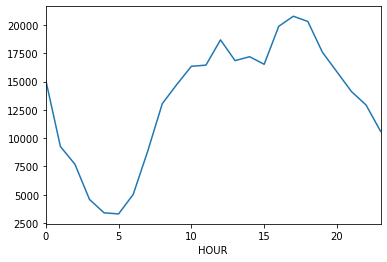

In [16]:
df1.drop_duplicates().groupby('HOUR')['INCIDENT_NUMBER'].count().sort_index().plot(kind='line')

In [30]:
sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
sorterIndex

{'Sunday': 0,
 'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6}

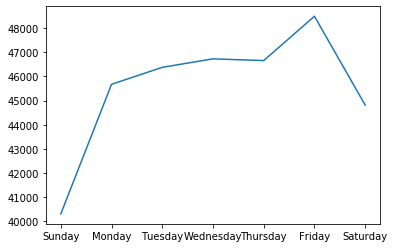

In [56]:
df_week=df1.drop_duplicates().groupby('DAY_OF_WEEK')['INCIDENT_NUMBER'].count().to_frame().reset_index()
df_week['DAY']=df_week['DAY_OF_WEEK']
df_week['DAY_OF_WEEK'] = df_week['DAY_OF_WEEK'].map(sorterIndex)
df_week.sort_values(by='DAY_OF_WEEK',inplace=True)
plot(df_week['DAY'],df_week['INCIDENT_NUMBER'])

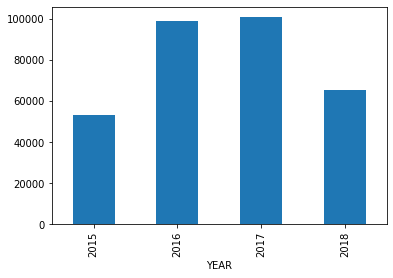

In [17]:
df1.drop_duplicates().groupby('YEAR')['INCIDENT_NUMBER'].count().sort_index().plot(kind='bar')

From the above analysis, we can say the following:
Most number of crimes happened in 2017 followed by 2016 and 2018. Crimes are most likely to happen over the week, with Sundays showing the lowest number of crimes and Fridays showing the highest. Interestingly, crime rates seem to be higher during evenings and afternoons, compared to early morning hours or post midnight hours.